In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contractions
import textblob
import re, string, unicodedata
import wordcloud
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

import nltk
nltk.download('all')

!pip install textblob
!python -m textblob.download_corpora



import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:
DataPath= "C:/Users/Home/OneDrive - Teesside University/Dissertation/Datasets/Suicide_Detection.csv/Suicide_Detection.csv"
Suicide_data_raw = pd.read_csv(DataPath)

In [3]:
Suicide_data_raw.head(5)

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
Suicide_data_raw.tail(5)

,Unnamed: 0,text,class
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide
232073,348110,I still haven't beaten the first boss in Hollo...,non-suicide


In [5]:
Suicide_data_raw.sample(5, random_state= 3)  # peak at a random sample of 5 rows

,Unnamed: 0,text,class
163325,245082,Typing out my issuesI've been living off what ...,suicide
146344,219612,"My jokes are like COVID-19 At first, no one ge...",non-suicide
143568,215492,&lt;Trigger Warning&gt; I may delete this soon...,suicide
24583,36932,Why can't you hear a pterodactyl go to the bat...,non-suicide
21246,31971,Staying awake Many seem to say before their sl...,non-suicide


In [6]:
Suicide_data= Suicide_data_raw[['class', 'text']]
Suicide_data.sample(5, random_state= 2)

,class,text
115313,suicide,You.‍‍‍‍I feel I deserve nothing. How many liv...
78611,suicide,Laters whoever knows me via this accountI’m cu...
199074,suicide,"Telling my best friend..I need help, how do i ..."
112519,non-suicide,unpopular opinion. Murder is wrong. Murderers ...
160158,suicide,Going to hang myself sitting downI have a rope...


In [7]:
Suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   class   232074 non-null  object
 1   text    232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [8]:
Suicide_data.dtypes

class    object
text     object
dtype: object

In [9]:
print(pd.isnull(Suicide_data).sum())

class    0
text     0
dtype: int64


Observations indicate that the dataset contains two columns, both of which are object data types, with no missing values. There are 232,074  rows in total 

<AxesSubplot:title={'center':'Distribution of Sucidal vs Non Suicidal Posts'}, ylabel='class'>

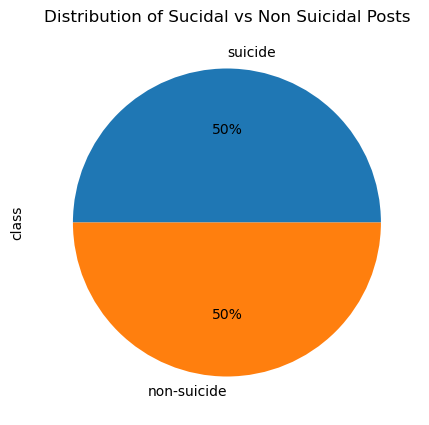

In [10]:
Suicide_data['class'].value_counts().plot(kind= 'pie', title='Distribution of Sucidal vs Non Suicidal Posts',figsize=(10,5),autopct='%1.0f%%')

It is Observed that the post are evenly distributed, Sucidal and Non-Sucidal classes having 50% each.

## Text Cleaning

In [11]:
# Function to clean contractions based on the map above
def clean_contractions(text):
    """Replace contractions in string of text"""
    text = contractions.fix(text)
    return text

def remove_html_tags_func(text):
     return BeautifulSoup(text, 'html.parser').get_text()
    
def remove_url_func(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def remove_accented_chars_func(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def remove_punctuation_func(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

def remove_irr_char_func(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

def remove_extra_whitespaces_func(text):
     return re.sub(r'^\s*|\s\s*', ' ', text).strip()

def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)



In [12]:
Suicide_data['clean_text'] = Suicide_data['text'].str.lower()
Suicide_data['clean_text'] = Suicide_data['clean_text'].apply(clean_contractions)
Suicide_data['clean_text'] = Suicide_data['clean_text'].apply(remove_html_tags_func)
Suicide_data['clean_text'] = Suicide_data['clean_text'].apply(remove_url_func)
Suicide_data['clean_text'] = Suicide_data['clean_text'].apply(remove_accented_chars_func)
Suicide_data['clean_text'] = Suicide_data['clean_text'].apply(remove_punctuation_func)
Suicide_data['clean_text'] = Suicide_data['clean_text'].apply(remove_irr_char_func)
Suicide_data['clean_text'] = Suicide_data['clean_text'].apply(remove_extra_whitespaces_func)
Suicide_data['clean_text'] = Suicide_data['clean_text'].apply(remove_emoji)

In [13]:
stop_words = stopwords.words('english')
Suicide_data['clean_text'] = Suicide_data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [14]:
def word_freq(corpus, ngrams=[1,2,3], top=10, figsize=(10,7), title = None):
    """Find how frequent words are in the text and plot the frequency.
    
    Arguments:
        corpus (str.): text to evaluate word frequency on
        ngrams (list): number of n-grams to look for in corpus
        top (int.)   : number of top words to plot
        figsize (tuple): figure size
        title (str.)   : figure title
    Returns: 
        dtf_freq (DataFrame): dataframe containing frequency of words in each corpus
        """
    
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    ngrams = [ngrams] if type(ngrams) is int else ngrams
    
    ## calculate
    dtf_freq = pd.DataFrame()
    for n in ngrams:
        dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
        dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
        dtf_n["ngrams"] = n
        dtf_freq = dtf_freq.append(dtf_n)
    dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
    dtf_freq = dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,
                data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(top))
    ax.set(xlabel= "Word frequency")
    plt.suptitle(title)
    plt.title(f"Top {top} words per n-grams")
    plt.show()
    ax.grid(axis="x")
    return dtf_freq

# suicide:


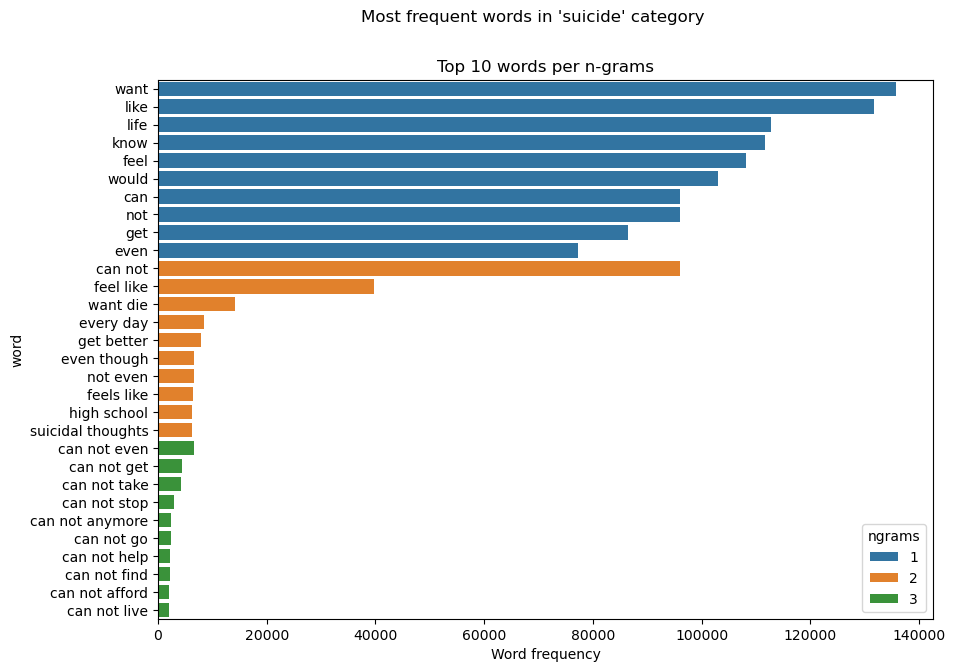

# non-suicide:


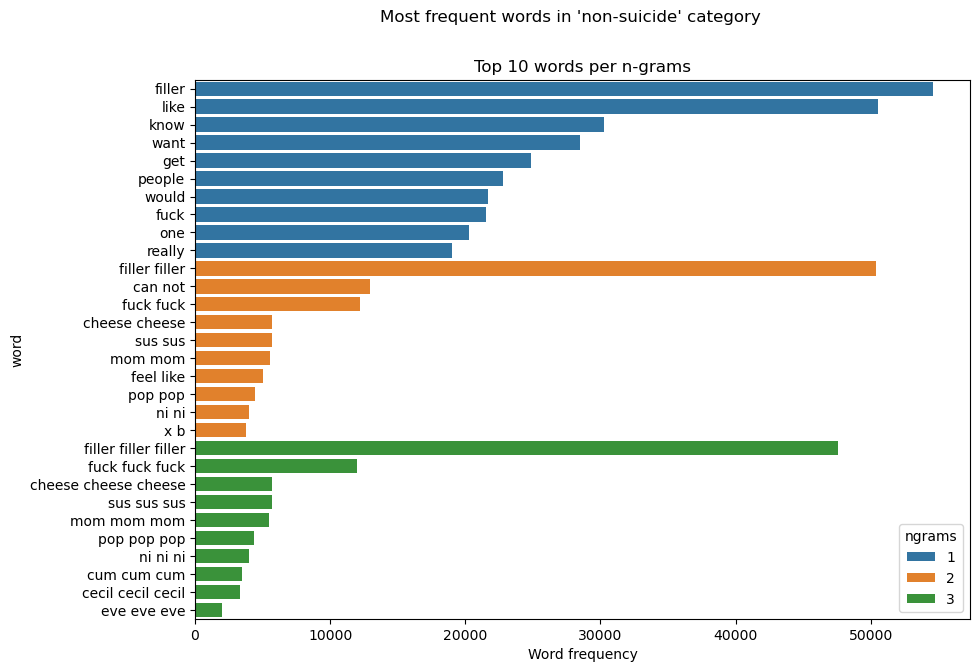

In [16]:
import seaborn as sns
dtf_freq = pd.DataFrame()
for y in Suicide_data["class"].unique():
    print("# {}:".format(y))
    dtf_y = word_freq(corpus=Suicide_data[Suicide_data["class"]==y]["clean_text"], ngrams=[1,2,3], top=10, figsize=(10,7), title = f"Most frequent words in '{y}' category")
    dtf_y["class"] = y
    dtf_freq = dtf_freq.append(dtf_y)

In [28]:
def plot_wordcloud(corpus, max_words=150, max_font_size=35, figsize=(10,10)):
    """Plot word cloud for a corpus.
    
    Arguments: 
        corpus (str.)       : text to plot word cloud for
        max_words (int.)    : exlude words as freqent as this
        max_font_size (int.): the font size for the most frequent word
        figsize             : figure size
    Returns: 
        plot (matplotlib): wordcloud plot
    """
    wc = wordcloud.WordCloud(background_color='white', colormap= 'magma', max_words=max_words, max_font_size=max_font_size)
    wc = wc.generate(str(corpus)) #if type(corpus) is not dict else wc.generate_from_frequencies(corpus)     
    fig = plt.figure(num=1, figsize=figsize)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show()

    

# suicide:


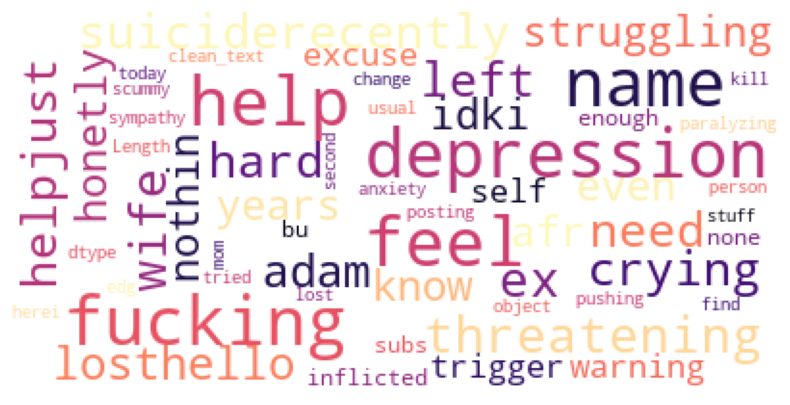

# non-suicide:


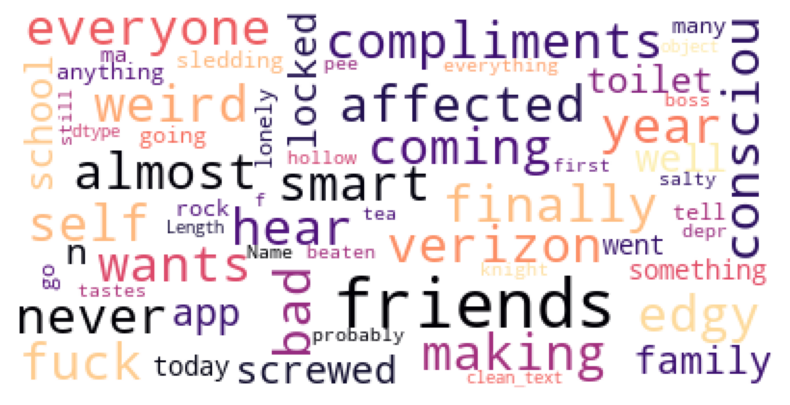

In [31]:
for y in Suicide_data["class"].unique():
    print(f"# {y}:")
    plot_wordcloud(corpus=Suicide_data[Suicide_data["class"]==y]["clean_text"], max_words=150, max_font_size=35, figsize=(10,5))

In [24]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return [w for w in tokens if w.isalpha()]

In [25]:
Suicide_data['clean_text']= Suicide_data['clean_text'].apply(tokenize)
Suicide_data.head(5)

,class,text,clean_text
0,suicide,Ex Wife Threatening SuicideRecently I left my ...,"[ex, wife, threatening, suiciderecently, left,..."
1,non-suicide,Am I weird I don't get affected by compliments...,"[weird, get, affected, compliments, coming, so..."
2,non-suicide,Finally 2020 is almost over... So I can never ...,"[finally, almost, never, hear, bad, year, ever..."
3,suicide,i need helpjust help me im crying so hard,"[need, helpjust, help, crying, hard]"
4,suicide,"I’m so lostHello, my name is Adam (16) and I’v...","[losthello, name, adam, struggling, years, afr..."


In [22]:
#Creating a word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='White', width=1600,                            
                      height=800,colormap= 'magma', max_words=300).generate(Suicide_data['clean_text'].to_string()) #convert to string using .join

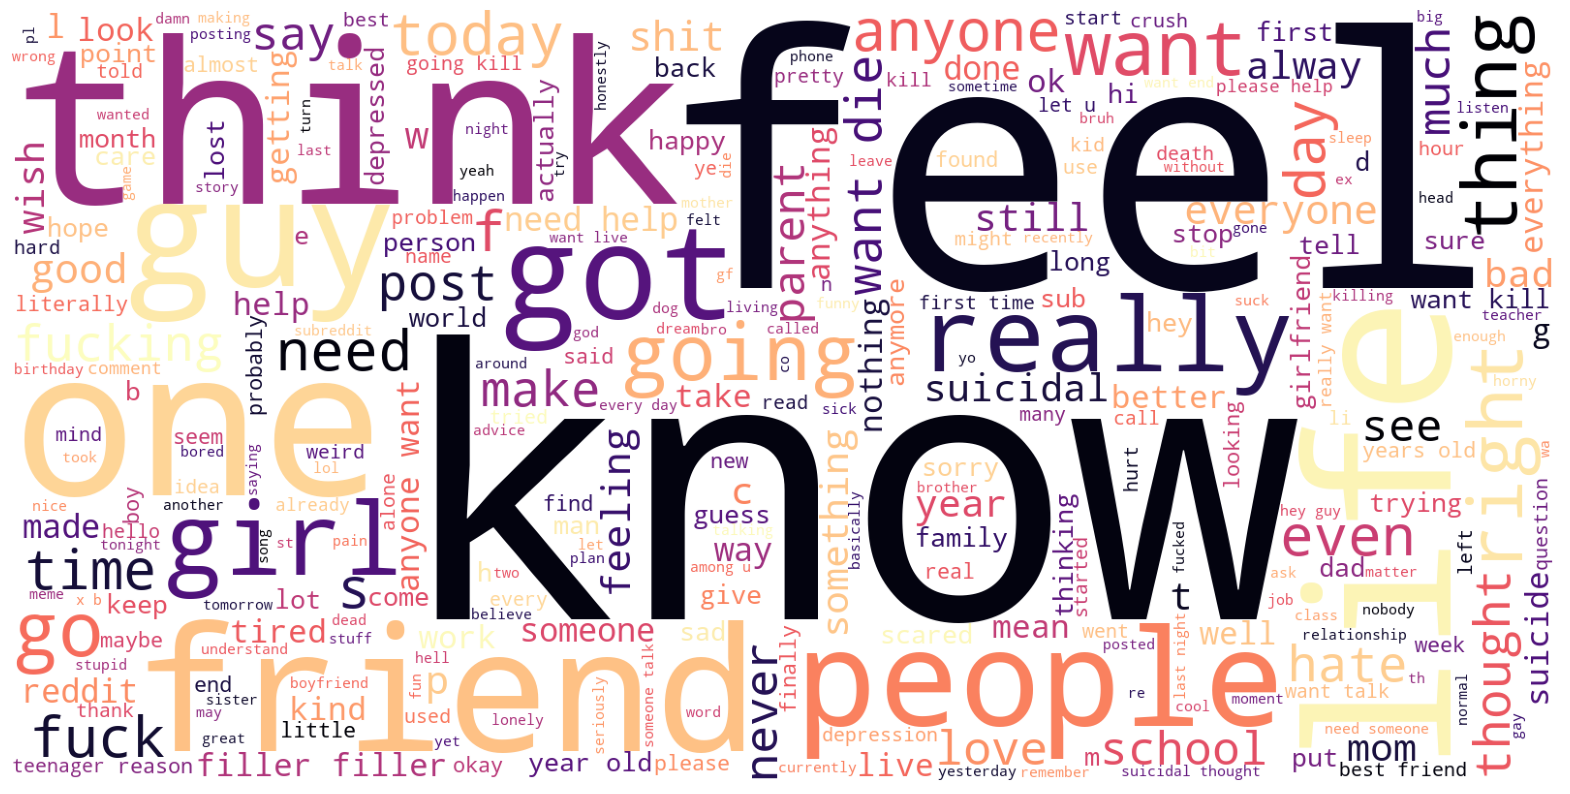

In [23]:
#Word  cloud for both suicide and non-sucicde
fig, ax = plt.subplots(figsize=(20,20))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.savefig("Suicidecloud.png2", format="png")
plt.imshow(wordcloud)  

In [32]:
#Export data
Suicide_data.to_csv('C:/Users/Home/OneDrive - Teesside University/Dissertation/Datasets/clean_sucicide_data.csv')